# IS 4487 Lab 4

## Outline

Repeat exercises from Lab 2, but with the *X SuperBowl* social media dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the X SuperBowl dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe
- Make sure you watch for line breaks and emojis that might cause problems with the data import

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df_new = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/x_superbowl.csv')

Mounted at /content/gdrive


In [3]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9756 entries, 0 to 9755
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 9756 non-null   int64  
 1   _id                        9756 non-null   object 
 2   created_at                 9756 non-null   object 
 3   id                         9756 non-null   float64
 4   id_str                     9756 non-null   int64  
 5   text                       9756 non-null   object 
 6   display_text_range         3222 non-null   object 
 7   source                     9747 non-null   object 
 8   truncated                  9756 non-null   bool   
 9   in_reply_to_status_id      2863 non-null   float64
 10  in_reply_to_status_id_str  2863 non-null   float64
 11  in_reply_to_user_id        2985 non-null   float64
 12  in_reply_to_user_id_str    2985 non-null   float64
 13  in_reply_to_screen_name    2985 non-null   objec

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as user_mentioned, from strings into numbers
- Reduce the variables in your dataframe to only those that have useful data
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [10]:
# Identifying columns that might contain string representations of numbers
numeric_cols_possible = df_new.select_dtypes(include=['object']).columns

for col in numeric_cols_possible:
    # Trying to convert each object column to numeric, ignoring errors
    df_new[col] = pd.to_numeric(df_new[col], errors='coerce')

# Reduce variables by removing columns with a high percentage of missing values
threshold_missing = 0.5  # Columns with more than 50% missing values will be dropped
df_reduced_new = df_new.dropna(thresh=int(threshold_missing * len(df_new)), axis=1)

# Identify numeric columns
numeric_columns_new = df_reduced_new.select_dtypes(include=['number']).columns

# Define a function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_threshold = 1.5 * IQR
    outliers = df[(df[column] < (Q1 - outlier_threshold)) | (df[column] > (Q3 + outlier_threshold))]
    return outliers

# Applying outlier detection
outliers_dict = {}
for col in numeric_columns_new:
    outliers = detect_outliers(df_reduced_new, col)
    if not outliers.empty:
        outliers_dict[col] = outliers

# Displaying the first few rows of the dataframe after conversion and reduction
df_reduced_new.head()

,Unnamed: 0,id,id_str,truncated,is_quote_status,quote_count,reply_count,retweet_count,favorite_count,favorited,retweeted
0,0,1.358630e+18,1358634152719839233,False,False,0,1,0,1,False,False
1,1,1.358630e+18,1358634138639605762,False,False,0,0,0,0,False,False
2,2,1.358630e+18,1358634110600826880,True,False,0,1,0,0,False,False
3,3,1.358630e+18,1358634090350583809,False,False,0,0,0,0,False,False
4,4,1.358630e+18,1358634084537352192,False,False,0,0,0,0,False,False


In [5]:
outliers_dict.keys()

dict_keys(['quote_count', 'reply_count', 'retweet_count', 'favorite_count'])

In [6]:
df_reduced_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9756 entries, 0 to 9755
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9756 non-null   int64  
 1   id               9756 non-null   float64
 2   id_str           9756 non-null   int64  
 3   truncated        9756 non-null   bool   
 4   is_quote_status  9756 non-null   bool   
 5   quote_count      9756 non-null   int64  
 6   reply_count      9756 non-null   int64  
 7   retweet_count    9756 non-null   int64  
 8   favorite_count   9756 non-null   int64  
 9   favorited        9756 non-null   bool   
 10  retweeted        9756 non-null   bool   
dtypes: bool(4), float64(1), int64(6)
memory usage: 571.8 KB


## Summarize Data

➡️ Assignment Tasks
- Create at least two charts to summarize and visualize the data
- Examples include: Number of posts per device; top 10 posts with highest engagement

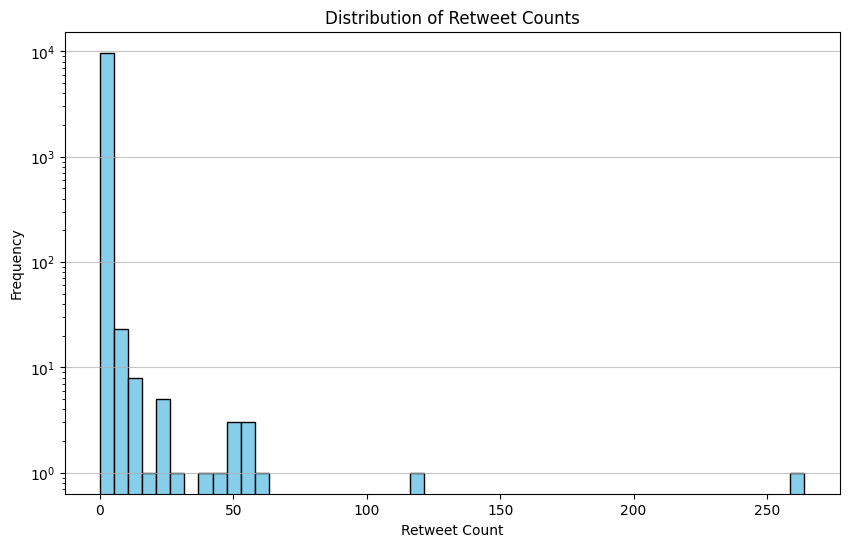

In [11]:
#chart 1
plt.figure(figsize=(10, 6))
plt.hist(df_reduced_new['retweet_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Retweet Counts')
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(axis='y', alpha=0.75)
plt.show()

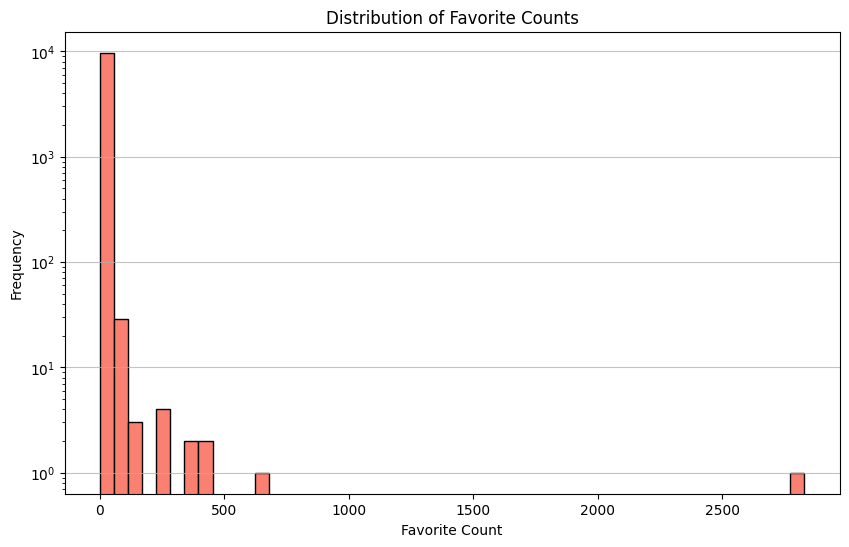

In [12]:
#chart 2
plt.figure(figsize=(10, 6))
plt.hist(df_reduced_new['favorite_count'], bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Favorite Counts')
plt.xlabel('Favorite Count')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(axis='y', alpha=0.75)
plt.show()